In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/messy-vs-clean-room/images/val/clean/1.png
/kaggle/input/messy-vs-clean-room/images/val/clean/7.png
/kaggle/input/messy-vs-clean-room/images/val/clean/0.png
/kaggle/input/messy-vs-clean-room/images/val/clean/8.png
/kaggle/input/messy-vs-clean-room/images/val/clean/3.png
/kaggle/input/messy-vs-clean-room/images/val/clean/2.png
/kaggle/input/messy-vs-clean-room/images/val/clean/6.png
/kaggle/input/messy-vs-clean-room/images/val/clean/9.png
/kaggle/input/messy-vs-clean-room/images/val/clean/5.png
/kaggle/input/messy-vs-clean-room/images/val/clean/4.png
/kaggle/input/messy-vs-clean-room/images/val/messy/1.png
/kaggle/input/messy-vs-clean-room/images/val/messy/7.png
/kaggle/input/messy-vs-clean-room/images/val/messy/0.png
/kaggle/input/messy-vs-clean-room/images/val/messy/8.png
/kaggle/input/messy-vs-clean-room/images/val/messy/3.png
/kaggle/input/messy-vs-clean-room/images/val/messy/2.png
/kaggle/input/messy-vs-clean-room/images/val/messy/6.png
/kaggle/input/messy-vs-clean-ro

In [14]:
import torch
import torch.nn as nn
import torchvision 
import torchvision.datasets as Ds
from torch.utils.data import DataLoader
import torchvision.transforms as transform

In [19]:
train_path="/kaggle/input/messy-vs-clean-room/images/images/train/"
data=Ds.ImageFolder(root=train_path)

## Checking Out the images and labels

### Messy

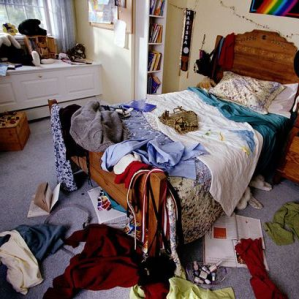

In [20]:
i,j=data[100]
i

In [21]:
j

1

### Clean 

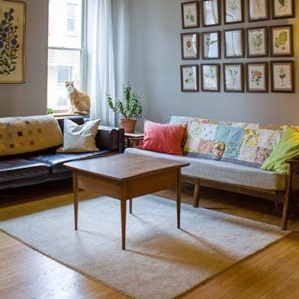

In [22]:
i,j=data[0]
i

In [23]:
j

0

### Transform 

In [24]:
train_path="/kaggle/input/messy-vs-clean-room/images/images/train/"
data=Ds.ImageFolder(root=train_path,transform=transform.ToTensor())

In [29]:
i,j=data[0]
i.shape

torch.Size([3, 299, 299])

In [102]:
train_loader=DataLoader(data,batch_size=15,shuffle=True)

In [103]:
for i,j in train_loader:
    img=i
    l=j
    
    

In [104]:
img.shape

torch.Size([5, 3, 299, 299])

# Model Building And Other Stuff

In [105]:
input_class=3*299*299
output_class=2

In [106]:
class LR(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(input_class,output_class)
    
    def forward(self,xb):
        xb=xb.reshape(-1,input_class)
        out=self.linear(xb)
        return out
        

In [107]:
model=LR()
loss=nn.functional.cross_entropy

In [108]:
def fit(epoch,lr,model,loss,data):
    optim=torch.optim.SGD(model.parameters(),lr=lr)
    for x in range(epoch):
        for i,j in data:
            pred=model(i)
            ls=loss(pred,j)
            ls.backward()
            optim.step()
            optim.zero_grad()
        print(ls)
        

In [109]:
fit(20,0.01,model,loss,train_loader)

tensor(123.5109, grad_fn=<NllLossBackward>)
tensor(137.1939, grad_fn=<NllLossBackward>)
tensor(47.7309, grad_fn=<NllLossBackward>)
tensor(313.7506, grad_fn=<NllLossBackward>)
tensor(87.4951, grad_fn=<NllLossBackward>)
tensor(83.9264, grad_fn=<NllLossBackward>)
tensor(0., grad_fn=<NllLossBackward>)
tensor(41.0194, grad_fn=<NllLossBackward>)
tensor(51.1538, grad_fn=<NllLossBackward>)
tensor(0., grad_fn=<NllLossBackward>)
tensor(1.3566, grad_fn=<NllLossBackward>)
tensor(210.8601, grad_fn=<NllLossBackward>)
tensor(27.2876, grad_fn=<NllLossBackward>)
tensor(40.0191, grad_fn=<NllLossBackward>)
tensor(0., grad_fn=<NllLossBackward>)
tensor(0.0111, grad_fn=<NllLossBackward>)
tensor(0., grad_fn=<NllLossBackward>)
tensor(0., grad_fn=<NllLossBackward>)
tensor(0., grad_fn=<NllLossBackward>)
tensor(0., grad_fn=<NllLossBackward>)


# Validating

In [171]:
val_path="/kaggle/input/messy-vs-clean-room/images/images/val/"
data=Ds.ImageFolder(root=val_path,transform=transform.ToTensor())

In [172]:
vali_loader=DataLoader(data,batch_size=10,shuffle=True)

In [173]:
def accuracy(pre,l):
    _,m=torch.max(pre,dim=1)
    out=torch.sum(m==l)/len(pre)
    return torch.tensor(out)

In [174]:
def eval(model,loss,validate):
    with torch.no_grad():
        for i,j in validate:
            pre=model(i)
            ls=loss(pre,j)
            acc=accuracy(pre,j)
            print(f"loss={ls} acc={acc}")

In [175]:
model2=LR()
loss=nn.functional.cross_entropy



In [176]:
evaluation=eval(model2,loss,vali_loader)

loss=0.7521231770515442 acc=0
loss=0.6884604692459106 acc=0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


In [181]:
vali_loader=DataLoader(data,batch_size=10,shuffle=True)

In [182]:
for i ,j in vali_loader:
    pre=model(i)
    l=j
    

In [183]:
_,index=torch.max(pre,dim=1)

In [184]:
index==l

tensor([True, True, True, True, True, True, True, True, True, True])

In [185]:
index

tensor([1, 1, 1, 1, 0, 0, 0, 0, 1, 0])

# Exporting the model

In [186]:
torch.save(model2.state_dict(),'modeldata.pth')

In [ ]:
model2.state_dict()

In [187]:
torch.load('modeldata.pth')

OrderedDict([('linear.weight',
              tensor([[ 0.0006,  0.0009, -0.0003,  ...,  0.0009,  0.0004, -0.0009],
                      [-0.0003, -0.0012, -0.0016,  ...,  0.0014,  0.0012,  0.0001]])),
             ('linear.bias', tensor([-6.4842e-04,  8.6766e-05]))])